In [1]:
import numpy as np
from scipy.linalg import schur
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3)
#np.set_printoptions(suppress=True)

In [3]:
from matcomp import algorithms as mca

In [4]:
def plot_matrices(matrices, size, tol, shape):

    num_matrices = len(matrices)
    assert num_matrices <= shape[0]*shape[1], 'matrices does not match shape'
    
    cmap = mpl.cm.get_cmap("hsv").copy()
    cmap.set_bad(color='black')

    plt.figure(figsize=size)
    
    for i, matrix in enumerate(matrices):

        plt.subplot(shape[0], shape[1], i+1)
        matrix_masked = np.ma.masked_where(np.abs(matrix) < tol, matrix)
        plt.matshow(matrix_masked, fignum=0, cmap=cmap)
        plt.colorbar()

    plt.tight_layout()
    plt.show()

In [5]:
np.random.seed(8)
N = 10
A = np.random.rand(N,N)

In [6]:
T_scipy, Z_scipy = schur(A)

In [7]:
np.allclose(A, Z_scipy@T_scipy@Z_scipy.T)

True

In [8]:
H = A.copy()

In [9]:
mca.upper_Hessen_House(H)

In [10]:
itmax = N-1

In [11]:
# QR iteration
T = np.triu(m=H, k=-1)
for i in range(itmax):
    mca.H_plus_RQ(T)

In [12]:
# Single-shift QR iteration
T_single_shift = np.triu(m=H, k=-1)
for i in range(itmax):
    mu = T_single_shift[-1,-1]
    T_single_shift -= mu*np.identity(N)
    mca.H_plus_RQ(T_single_shift)
    T_single_shift += mu*np.identity(N)

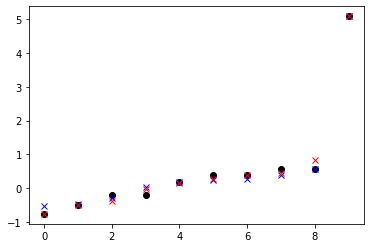

In [13]:
plt.figure()
plt.plot(np.sort(np.diag(T_scipy)), 'ko', linewidth=3)
plt.plot(np.sort(np.diag(T)), 'bx', linewidth=3)
plt.plot(np.sort(np.diag(T_single_shift)), 'rx', linewidth=3)
plt.show()

In [14]:
np.sort(np.diag(T_scipy))

array([-0.756, -0.503, -0.194, -0.194,  0.174,  0.393,  0.393,  0.573,
        0.573,  5.08 ])

In [15]:
np.sort(np.diag(T))

array([-0.51 , -0.457, -0.299,  0.044,  0.174,  0.244,  0.288,  0.395,
        0.58 ,  5.08 ])

In [16]:
np.sort(np.diag(T_single_shift))

array([-0.755, -0.503, -0.379, -0.012,  0.148,  0.28 ,  0.405,  0.448,
        0.826,  5.08 ])

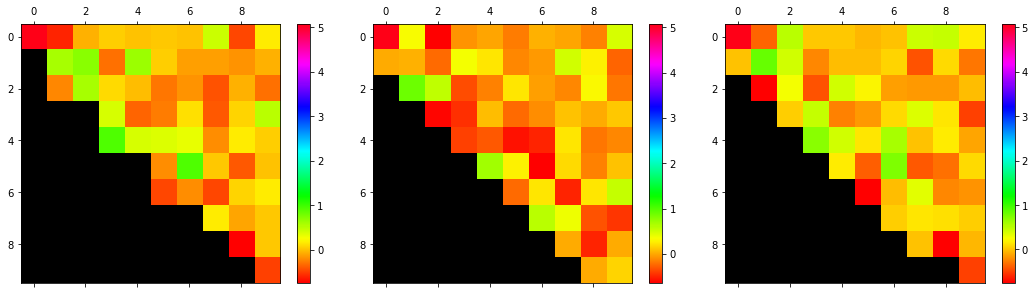

In [17]:
plot_matrices(matrices=[T_scipy, T, T_single_shift], size=(15,4), tol=1e-10, shape=(1,3))